In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
file_path = r"C:\Users\bbuser\Desktop\DataScience-Brain-Bytes\Team_members\from_maha\data\diabetes.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


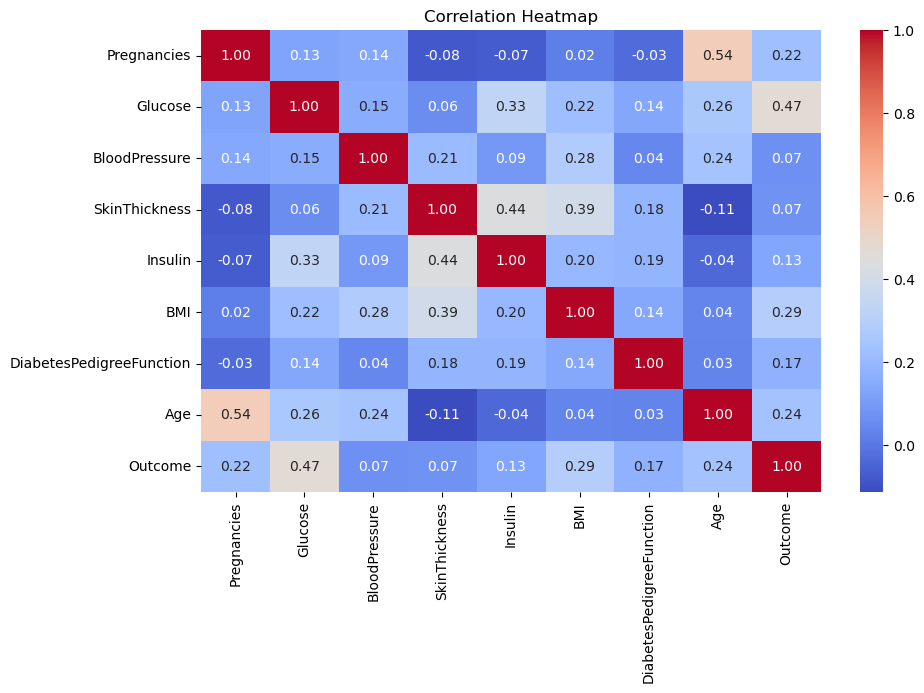

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

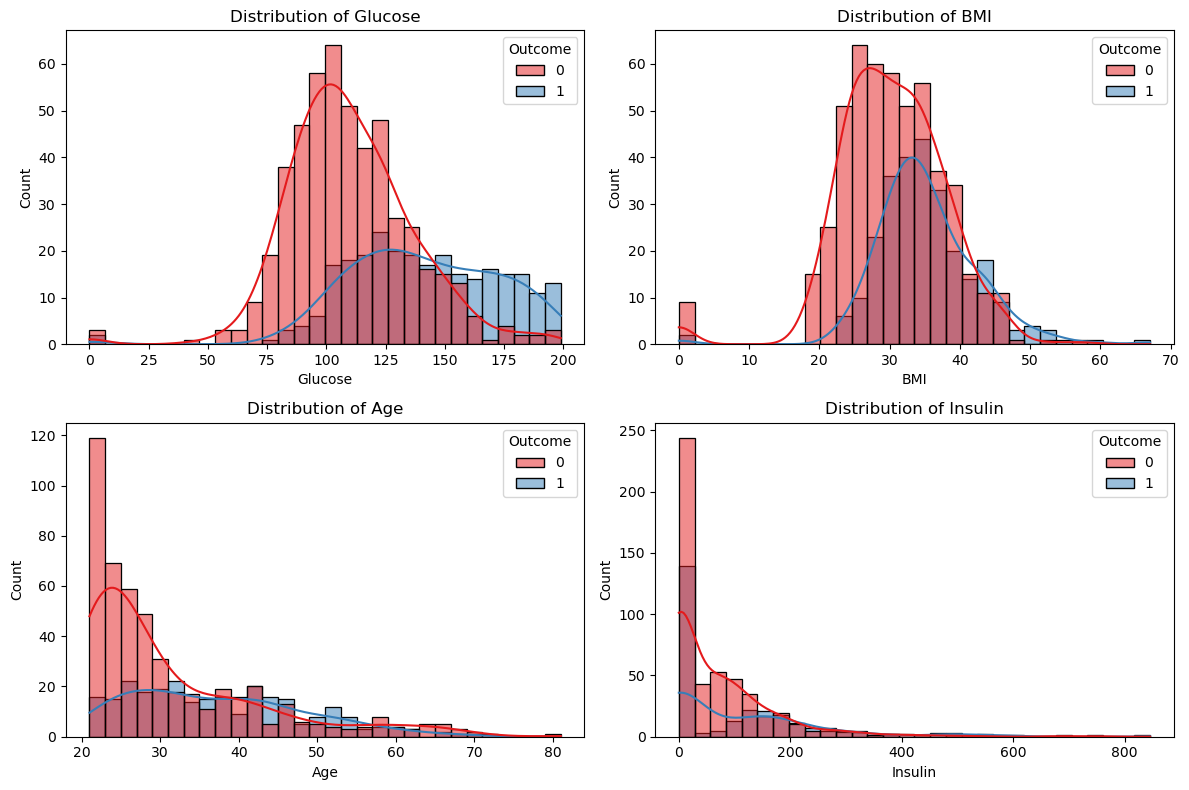

In [5]:
features_to_plot = ["Glucose", "BMI", "Age", "Insulin"]

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=feature, hue="Outcome", kde=True, bins=30, palette="Set1")
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

In [6]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)  # default k=5
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

In [11]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n=== {model_name} Evaluation ===")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-score :", f1_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

In [12]:
evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")


=== Logistic Regression Evaluation ===
Accuracy : 0.7142857142857143
Precision: 0.6086956521739131
Recall   : 0.5185185185185185
F1-score : 0.56

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154


=== K-Nearest Neighbors Evaluation ===
Accuracy : 0.7012987012987013
Precision: 0.5833333333333334
Recall   : 0.5185185185185185
F1-score : 0.5490196078431373

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.58      0.52      0.55        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70  

In [13]:
print("\nComparison Summary:")
results = {
    "Logistic Regression": [
        accuracy_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_log),
    ],
    "KNN": [
        accuracy_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_knn),
    ],
}

comparison_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-score"])
print(comparison_df)


Comparison Summary:
           Logistic Regression       KNN
Accuracy              0.714286  0.701299
Precision             0.608696  0.583333
Recall                0.518519  0.518519
F1-score              0.560000  0.549020
